## This Script Contains the Following Points
#### 1. Importing Libraries
#### 2. Loading Data & Images
#### 3. Creating CNN Model
#### 4. Plotting Accuracy and Loss
#### 5. Creating Confusion Matrix
#### 6. Generating Images and Predictions

# 1. Importing Libraries & Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [6]:
#show all plots
%matplotlib inline

#turning off warning feature
warnings.filterwarnings('ignore')

## 2. Loading Data & Images

In [16]:
# Creating path to project folder

path = r'/Users/C SaiVishwanath/Desktop/ClimateWins/01 Data/Original Data/Multi-class Weather Dataset'

In [18]:
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [20]:
# Loading in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# 3. Creating CNN Model

In [23]:
# Creating CNN to categorize the weather images

epochs = 45  # Increase epochs
dropout_rate = 0.5  # Adjust dropout rate
learning_rate = 0.001  # Adjust learning rate

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(dropout_rate,seed=5)(x)  # Adjusted dropout rate
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [25]:
# Compiling and running the model

model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"]) #mean_squared_error
model.fit(
    train_generator, 
    epochs=epochs,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

Epoch 1/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - accuracy: 0.4660 - loss: 1.1102 - val_accuracy: 0.6473 - val_loss: 0.7734
Epoch 2/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8000 - loss: 0.4324 - val_accuracy: 0.7054 - val_loss: 0.7059
Epoch 3/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 636ms/step - accuracy: 0.7767 - loss: 0.5731 - val_accuracy: 0.4688 - val_loss: 1.6440
Epoch 4/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5000 - loss: 1.7168 - val_accuracy: 0.7500 - val_loss: 0.5928
Epoch 5/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 626ms/step - accuracy: 0.7795 - loss: 0.6134 - val_accuracy: 0.6875 - val_loss: 0.8446
Epoch 6/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8438 - loss: 0.4802 - val_accuracy: 0.6875 - val_loss: 0.8498
Epoch 7/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 636ms/step - accuracy: 0.7753 - loss: 0.4972 - val_accuracy: 0.7857 - val_loss: 0.5462
Epoch 8/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8125 - loss: 0.5174 - val_accuracy: 0.

Notes: 
- Converges around Epoch 28 with a val_loss of 0.3352 and a val_accuracy of 0.8795 
- Total of 45 epochs as specified in the code

# 4. Plotting Accuracy & Loss

In [29]:
for key, value in model.history.history.items():
    print(f"{key}: {len(value)}")

accuracy: 45
loss: 45
val_accuracy: 45
val_loss: 45


In [31]:
# Checking the lengths of all keys in the history

history_data = model.history.history
lengths = [len(v) for v in history_data.values()]

# If lengths are inconsistent, trim them to the smallest length (if needed)
min_length = min(lengths)
for key in history_data:
    history_data[key] = history_data[key][:min_length]

# Now you can create the DataFrame
results = pd.DataFrame(history_data)

In [33]:
results = pd.DataFrame(model.history.history)

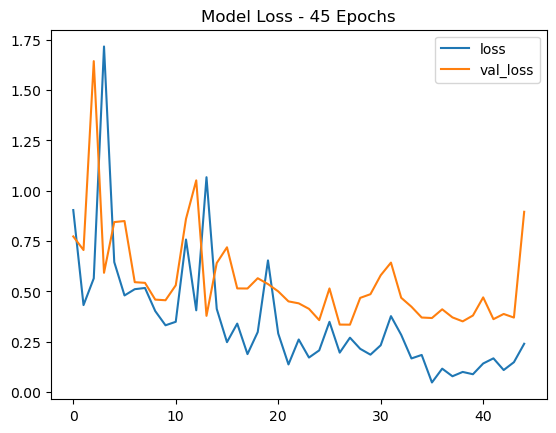

In [35]:
results[['loss','val_loss']].plot(title='Model Loss - 45 Epochs')
plt.savefig('./loss.png')

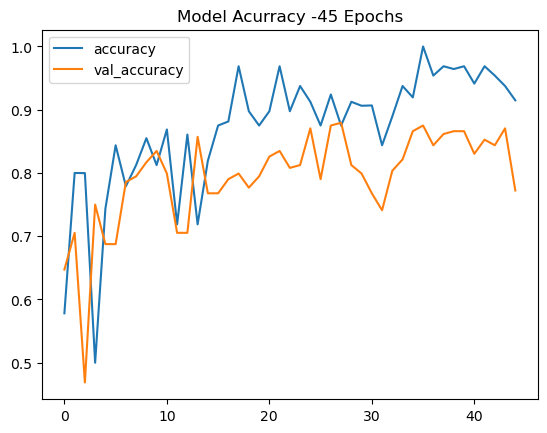

In [37]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy -45 Epochs')
plt.savefig('./accuracy.png')

In [39]:
# Printing the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9148446321487427, Val_Accuracy: 0.7723214030265808
Loss: 0.2403140515089035, Val_Loss: 0.8957651853561401


# 5. Creating Confusion Matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step


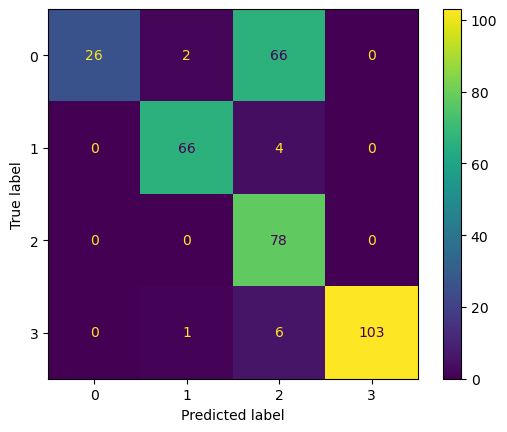

In [42]:
# Collecting n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Creating Confusion matrix for training data

cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# 6. Generating Images and Predictions

In [45]:
# Displaying a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


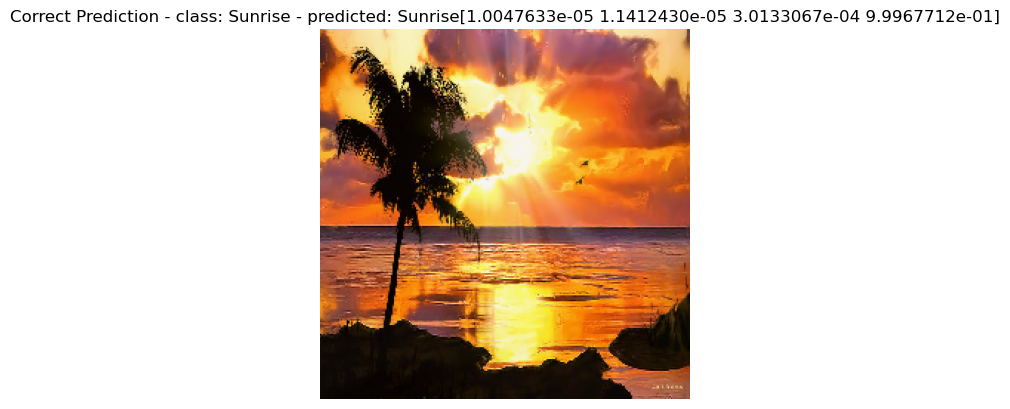

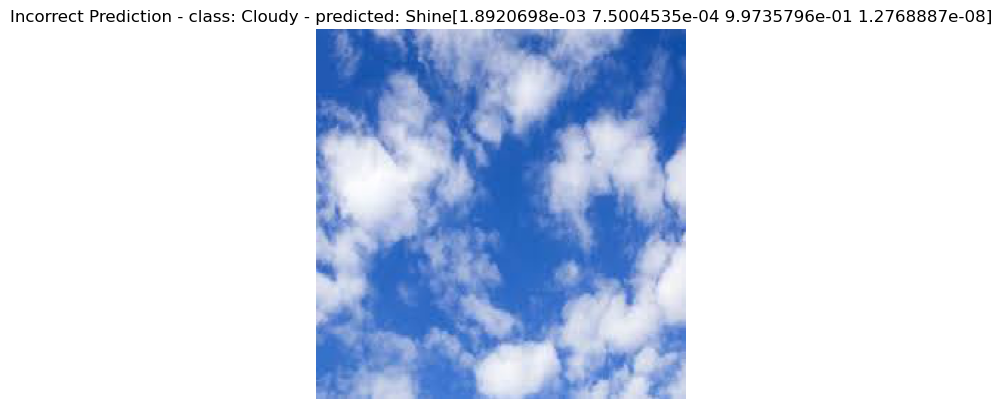

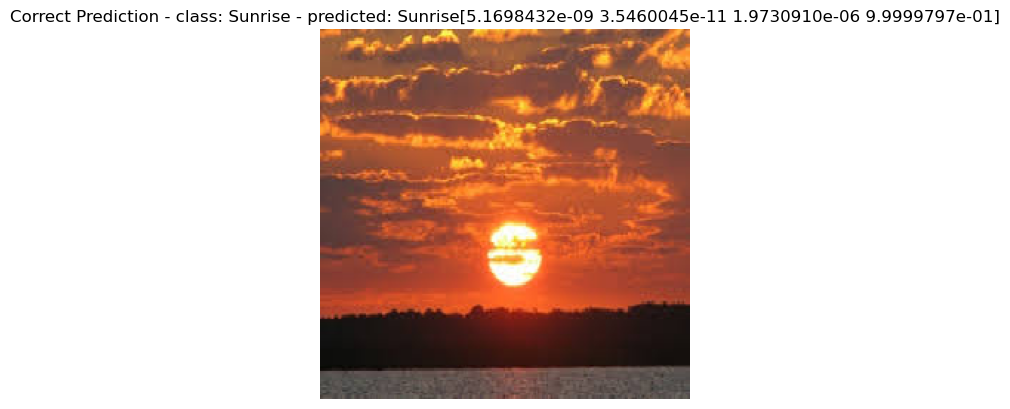

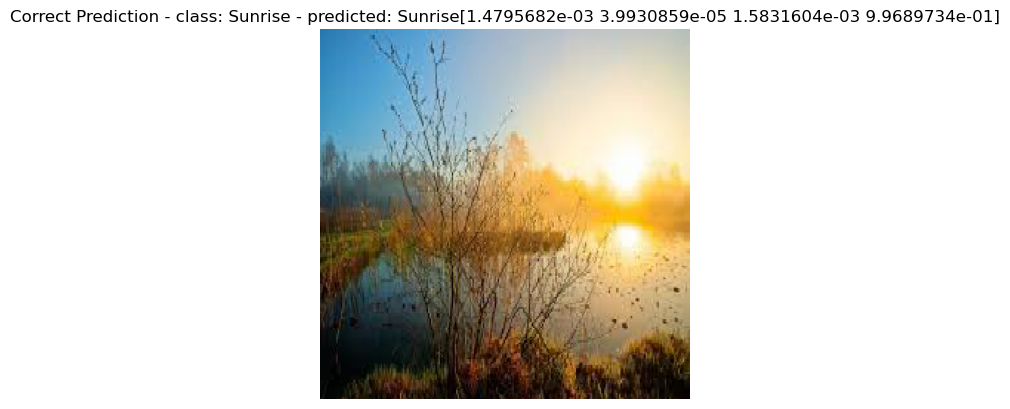

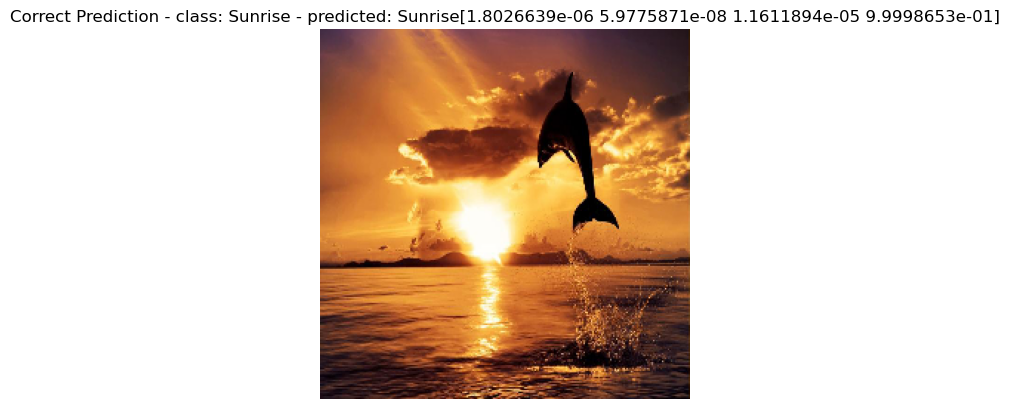

In [53]:
predict_one(model, 5)